# BLOCK 1: Check GPU & Mount


The code checks for GPU support, mounts your Google Drive, and prints a message confirming access to the dataset.

In [4]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

from google.colab import drive
drive.mount('/content/drive')

print("Drive mounted. Your dataset is accessible at /content/drive/MyDrive/BloodCellDetection")

Using device: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted. Your dataset is accessible at /content/drive/MyDrive/BloodCellDetection


# BLOCK 2: Clone & Install

The code changes the directory to /content, clones the YOLOv5 repository from GitHub, navigates into the YOLOv5 directory, installs the necessary dependencies from the requirements.txt file, and prints a confirmation message indicating that YOLOv5 has been successfully set up.

In [9]:
!pip uninstall ultralytics -y

In [10]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt -q

print("YOLOv5 cloned and requirements installed successfully!")

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
YOLOv5 cloned and requirements installed successfully!


Found existing installation: ultralytics 8.3.56
Uninstalling ultralytics-8.3.56:
  Successfully uninstalled ultralytics-8.3.56


# BLOCK 3: List Dataset

The code lists the contents of the main BloodCellDetection directory in Google Drive. It then displays the first five filenames from the train/images, valid/images, and test/images folders for a quick preview without overwhelming the output. The comment explains that showing only five lines is intentional to avoid flooding the output, and it reassures that having only the training data is sufficient to proceed.

In [3]:
!ls "/content/drive/MyDrive/BloodCellDetection"

print("\n===== Train Images =====")
!ls "/content/drive/MyDrive/BloodCellDetection/train/images" | head -n 5

print("\n===== Valid Images =====")
!ls "/content/drive/MyDrive/BloodCellDetection/valid/images" | head -n 5

print("\n===== Test Images =====")
!ls "/content/drive/MyDrive/BloodCellDetection/test/images" | head -n 5

# 'head -n 5' just shows first 5 lines, so as not to flood output.
# If you only have train, that’s okay. We can still proceed.

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

===== Train Images =====
BloodImage_00001_jpg.rf.c819716ad5efed5a5d05d0bfc21ac307.jpg
BloodImage_00002_jpg.rf.58176c10ae57a94a13c5f86e8d7acecf.jpg
BloodImage_00003_jpg.rf.6d30d46838b326627973df8a4b93b7ee.jpg
BloodImage_00005_jpg.rf.787ef703815bb765c92cdb0eab264c83.jpg
BloodImage_00006_jpg.rf.de6b2d106bb9e313ab834585c9f51b2b.jpg

===== Valid Images =====
BloodImage_00000_jpg.rf.b9b54ee242858a8aa6282ee25f3c06d0.jpg
BloodImage_00004_jpg.rf.32f80737b874b0728582d77e7c409dd5.jpg
BloodImage_00012_jpg.rf.c13d42e1d82ce2884cb53e803eef77c2.jpg
BloodImage_00017_jpg.rf.4cfec76b2314dcd5ec636e88022a15c4.jpg
BloodImage_00021_jpg.rf.958b85e69293875ea481e8913fd7f93d.jpg

===== Test Images =====
BloodImage_00038_jpg.rf.03bd3f26d2c86bdd5bfada9cac475eef.jpg
BloodImage_00044_jpg.rf.8c7c002d9c66db2405d91d52ba69e365.jpg
BloodImage_00062_jpg.rf.ffe1b6c6ecd4e798ced1b0614e841fc1.jpg
BloodImage_00090_jpg.rf.f6ebfdf834b4742320257f5996c5026f.jp

# BLOCK 4: Overwrite data.yaml



The code creates or overwrites a file named data.yaml in the BloodCellDetection directory on Google Drive. This file specifies paths to the training (train) and validation (val) image directories, the number of classes (nc) in the dataset (3 classes), and the names of these classes (Platelets, RBC, and WBC). This configuration file is commonly used in YOLO models to define dataset structure and class labels.

In [4]:
%%writefile /content/drive/MyDrive/BloodCellDetection/data.yaml
train: /content/drive/MyDrive/BloodCellDetection/train/images
val:   /content/drive/MyDrive/BloodCellDetection/valid/images


# Number of classes
nc: 3

# Class names (Blood Cell Classes)
names: ["Platelets", "RBC", "WBC"]

Overwriting /content/drive/MyDrive/BloodCellDetection/data.yaml


# BLOCK 5: Train


The code changes the working directory to the YOLOv5 folder, sets paths for the dataset configuration file (data.yaml) and the YOLOv5 model configuration file (yolov5s.yaml). It then runs the YOLOv5 training script with the specified parameters: dataset configuration, model configuration, pre-trained weights (yolov5s.pt), 50 training epochs, a batch size of 16, an input image size of 640x640 pixels, a custom experiment name (single_folder_exp), and caching of images for faster processing. This trains a YOLOv5 model using the blood cell dataset.

In [5]:
%cd /content/yolov5

data_yaml_path = "/content/drive/MyDrive/BloodCellDetection/data.yaml"
cfg_path = "yolov5s.yaml"   # You can replace with a custom YOLOv5 config if desired

!python train.py \
  --data {data_yaml_path} \
  --cfg {cfg_path} \
  --weights yolov5s.pt \
  --epochs 50 \
  --batch 16 \
  --img 640 \
  --name single_folder_exp \
  --cache

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-31 14:51:18.659756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-31 14:51:18.679941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-31 14:51:18.685995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452

# BLOCK 6: Basic Visualization


The code checks if the training results image (results.png) exists in the specified directory for the YOLOv5 training run. If the file exists, it displays the image using IPython's display function, resizing it to a width of 800 pixels. If the file is not found, it prints an error message suggesting potential issues such as an incorrect run name or incomplete training.

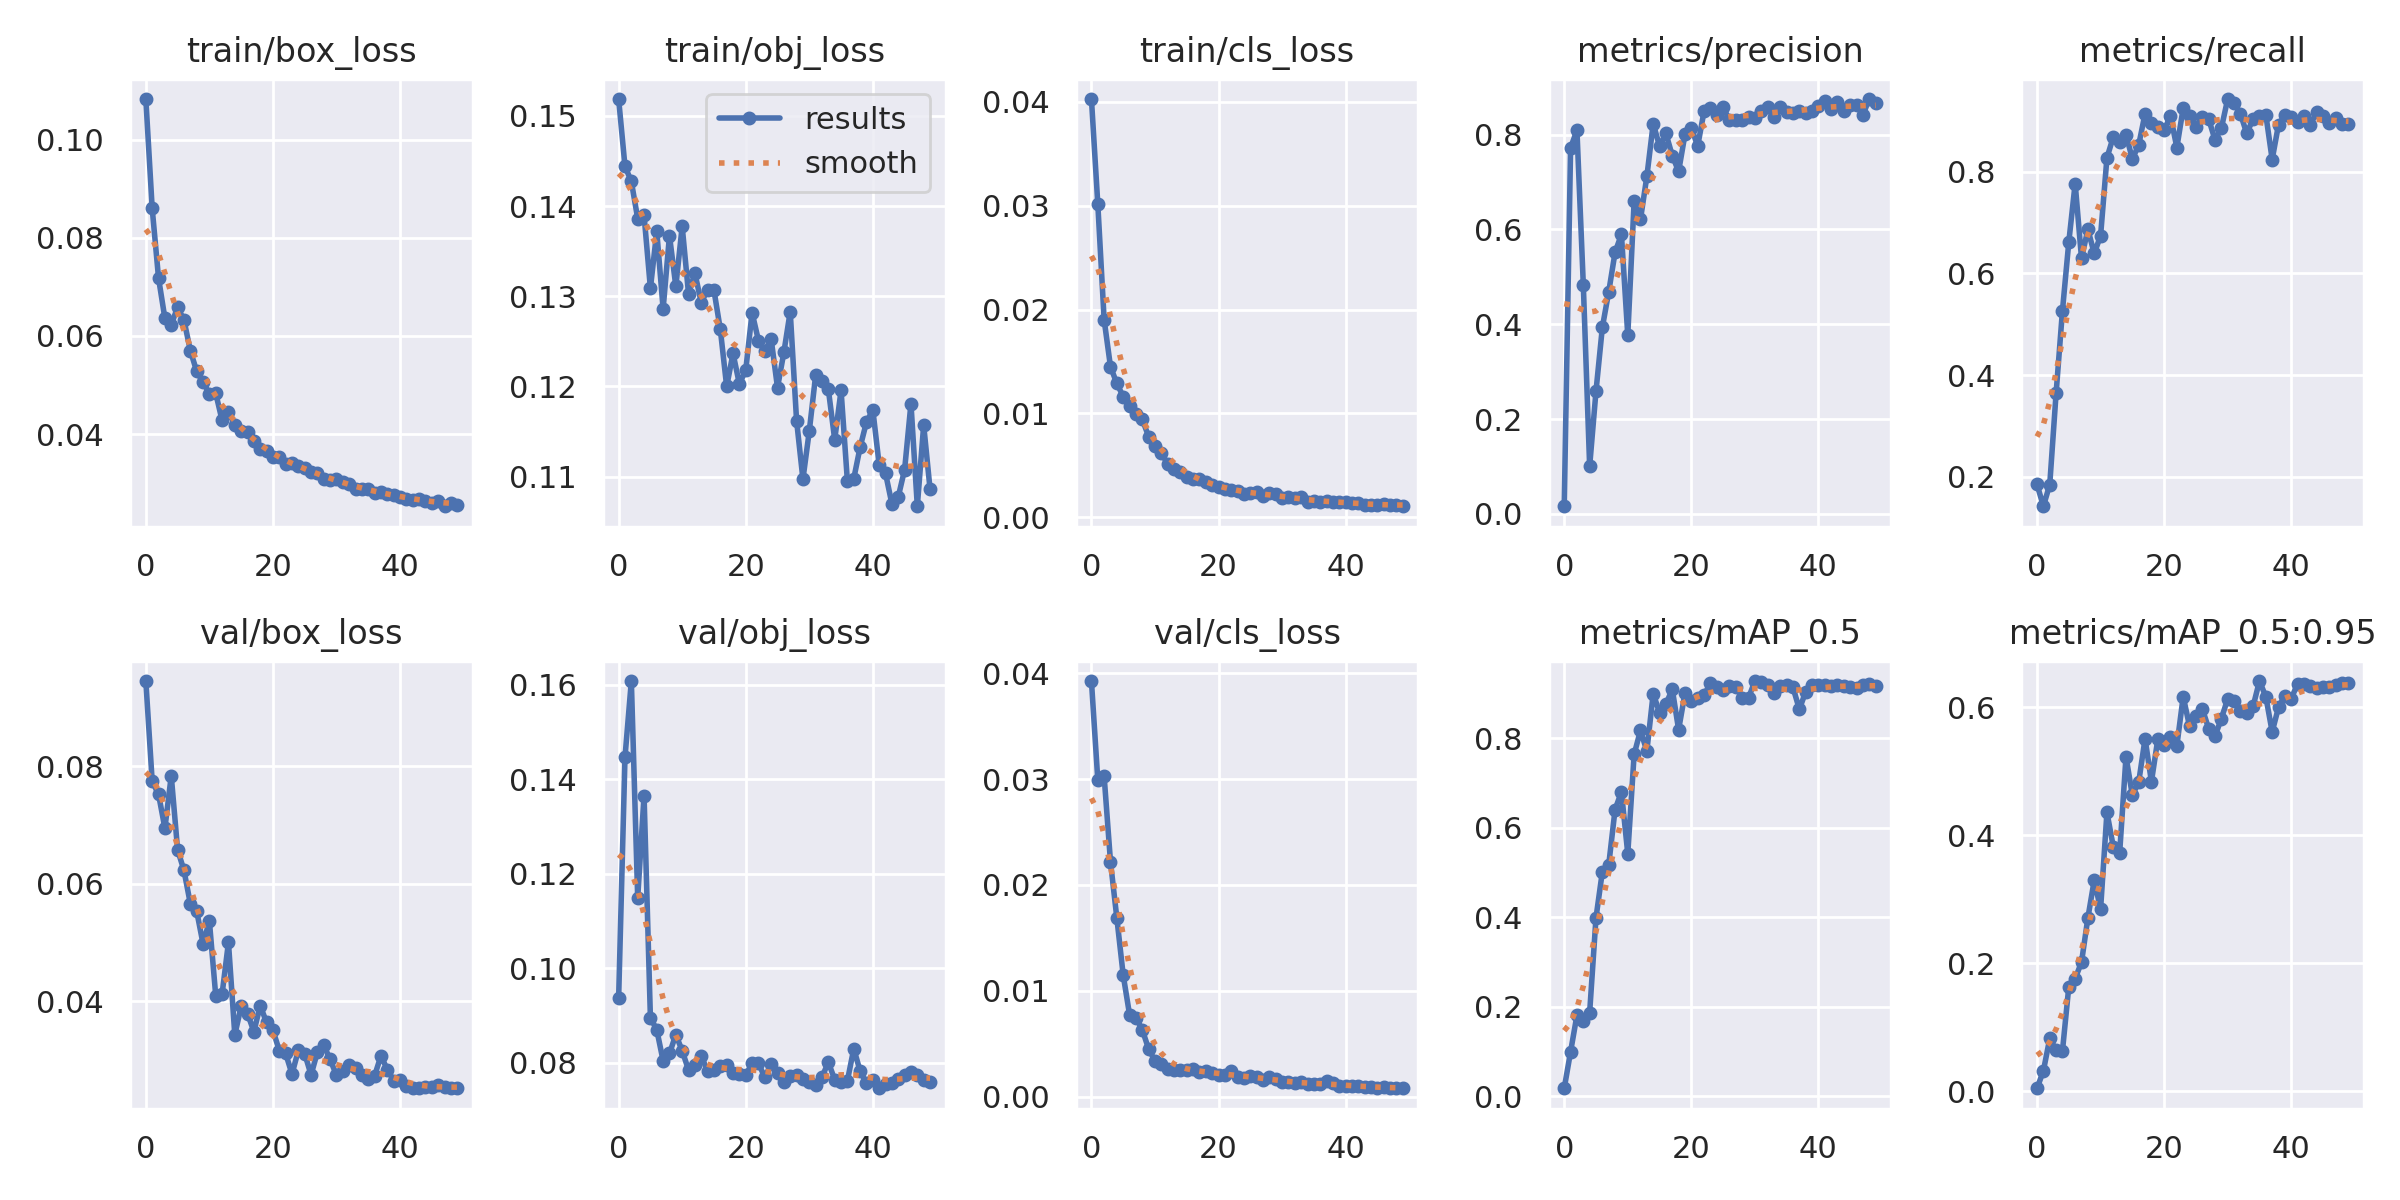

In [6]:
import os
from IPython.display import Image, display

results_png = "/content/yolov5/runs/train/single_folder_exp/results.png"

if os.path.exists(results_png):
    display(Image(filename=results_png, width=800))
else:
    print("results.png not found. Check if your run name was correct or if training finished properly.")

**Overall Analysis:**

The learning curves indicate that the model is learning effectively and generalizing well.

The smooth decrease in loss curves and steady increase in evaluation metrics suggest that the training is stable, and the model's performance is improving without signs of overfitting.

This is a strong training result, and the model appears ready for testing or deployment.

# BLOCK 7: Advanced Evaluation


The code runs the YOLOv5 validation script to evaluate the trained model. It uses the following parameters:

--weights: Specifies the path to the trained model weights (best.pt from the training run)

--data: Points to the dataset configuration file (data.yaml), which defines paths, number of classes, and class names

--img: Sets the input image size to 640x640 pixels

--conf: Sets the confidence threshold for predictions to 0.001, allowing all predictions to be evaluated regardless of confidence level

--iou: Specifies the Intersection over Union (IoU) threshold of 0.65 for evaluating overlaps between predictions and ground truths

--task val: Indicates that the task is validation, using the validation dataset

This evaluates the model's performance on the validation dataset and provides metrics like precision, recall, and mAP (mean Average Precision).

In [7]:
!python val.py \
    --weights runs/train/single_folder_exp/weights/best.pt \
    --data /content/drive/MyDrive/BloodCellDetection/data.yaml \
    --img 640 \
    --conf 0.001 \
    --iou 0.65 \
    --task val


val: data=/content/drive/MyDrive/BloodCellDetection/data.yaml, weights=['runs/train/single_folder_exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/BloodCellDetection/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:04<00:00,  1.39s/it]
                   all         73        967      0.849      0.902      0.918       0.64
             Platelets         73         76      0.823

# BLOCK 8: Display Advanced Plots


The code checks for the results of the YOLOv5 validation process and displays key visual metrics. Here's what it does:

Search for Validation Directories: It looks for folders named exp* in the runs/val directory, which store validation results. If no such folders are found, it prints an error message suggesting that the val.py --plots step might not have run correctly.

Identify the Latest Validation Folder: Among the found folders, it selects the most recent one (latest_val_dir) and prints its path.

Display Validation Metrics: It attempts to display key result images generated by YOLOv5 during validation (F1_curve.png, PR_curve.png, confusion_matrix.png, val_results.png). If any of these images are missing, it prints a message indicating so.

This code provides a convenient way to review validation results through generated plots.

Latest validation folder: runs/val/exp


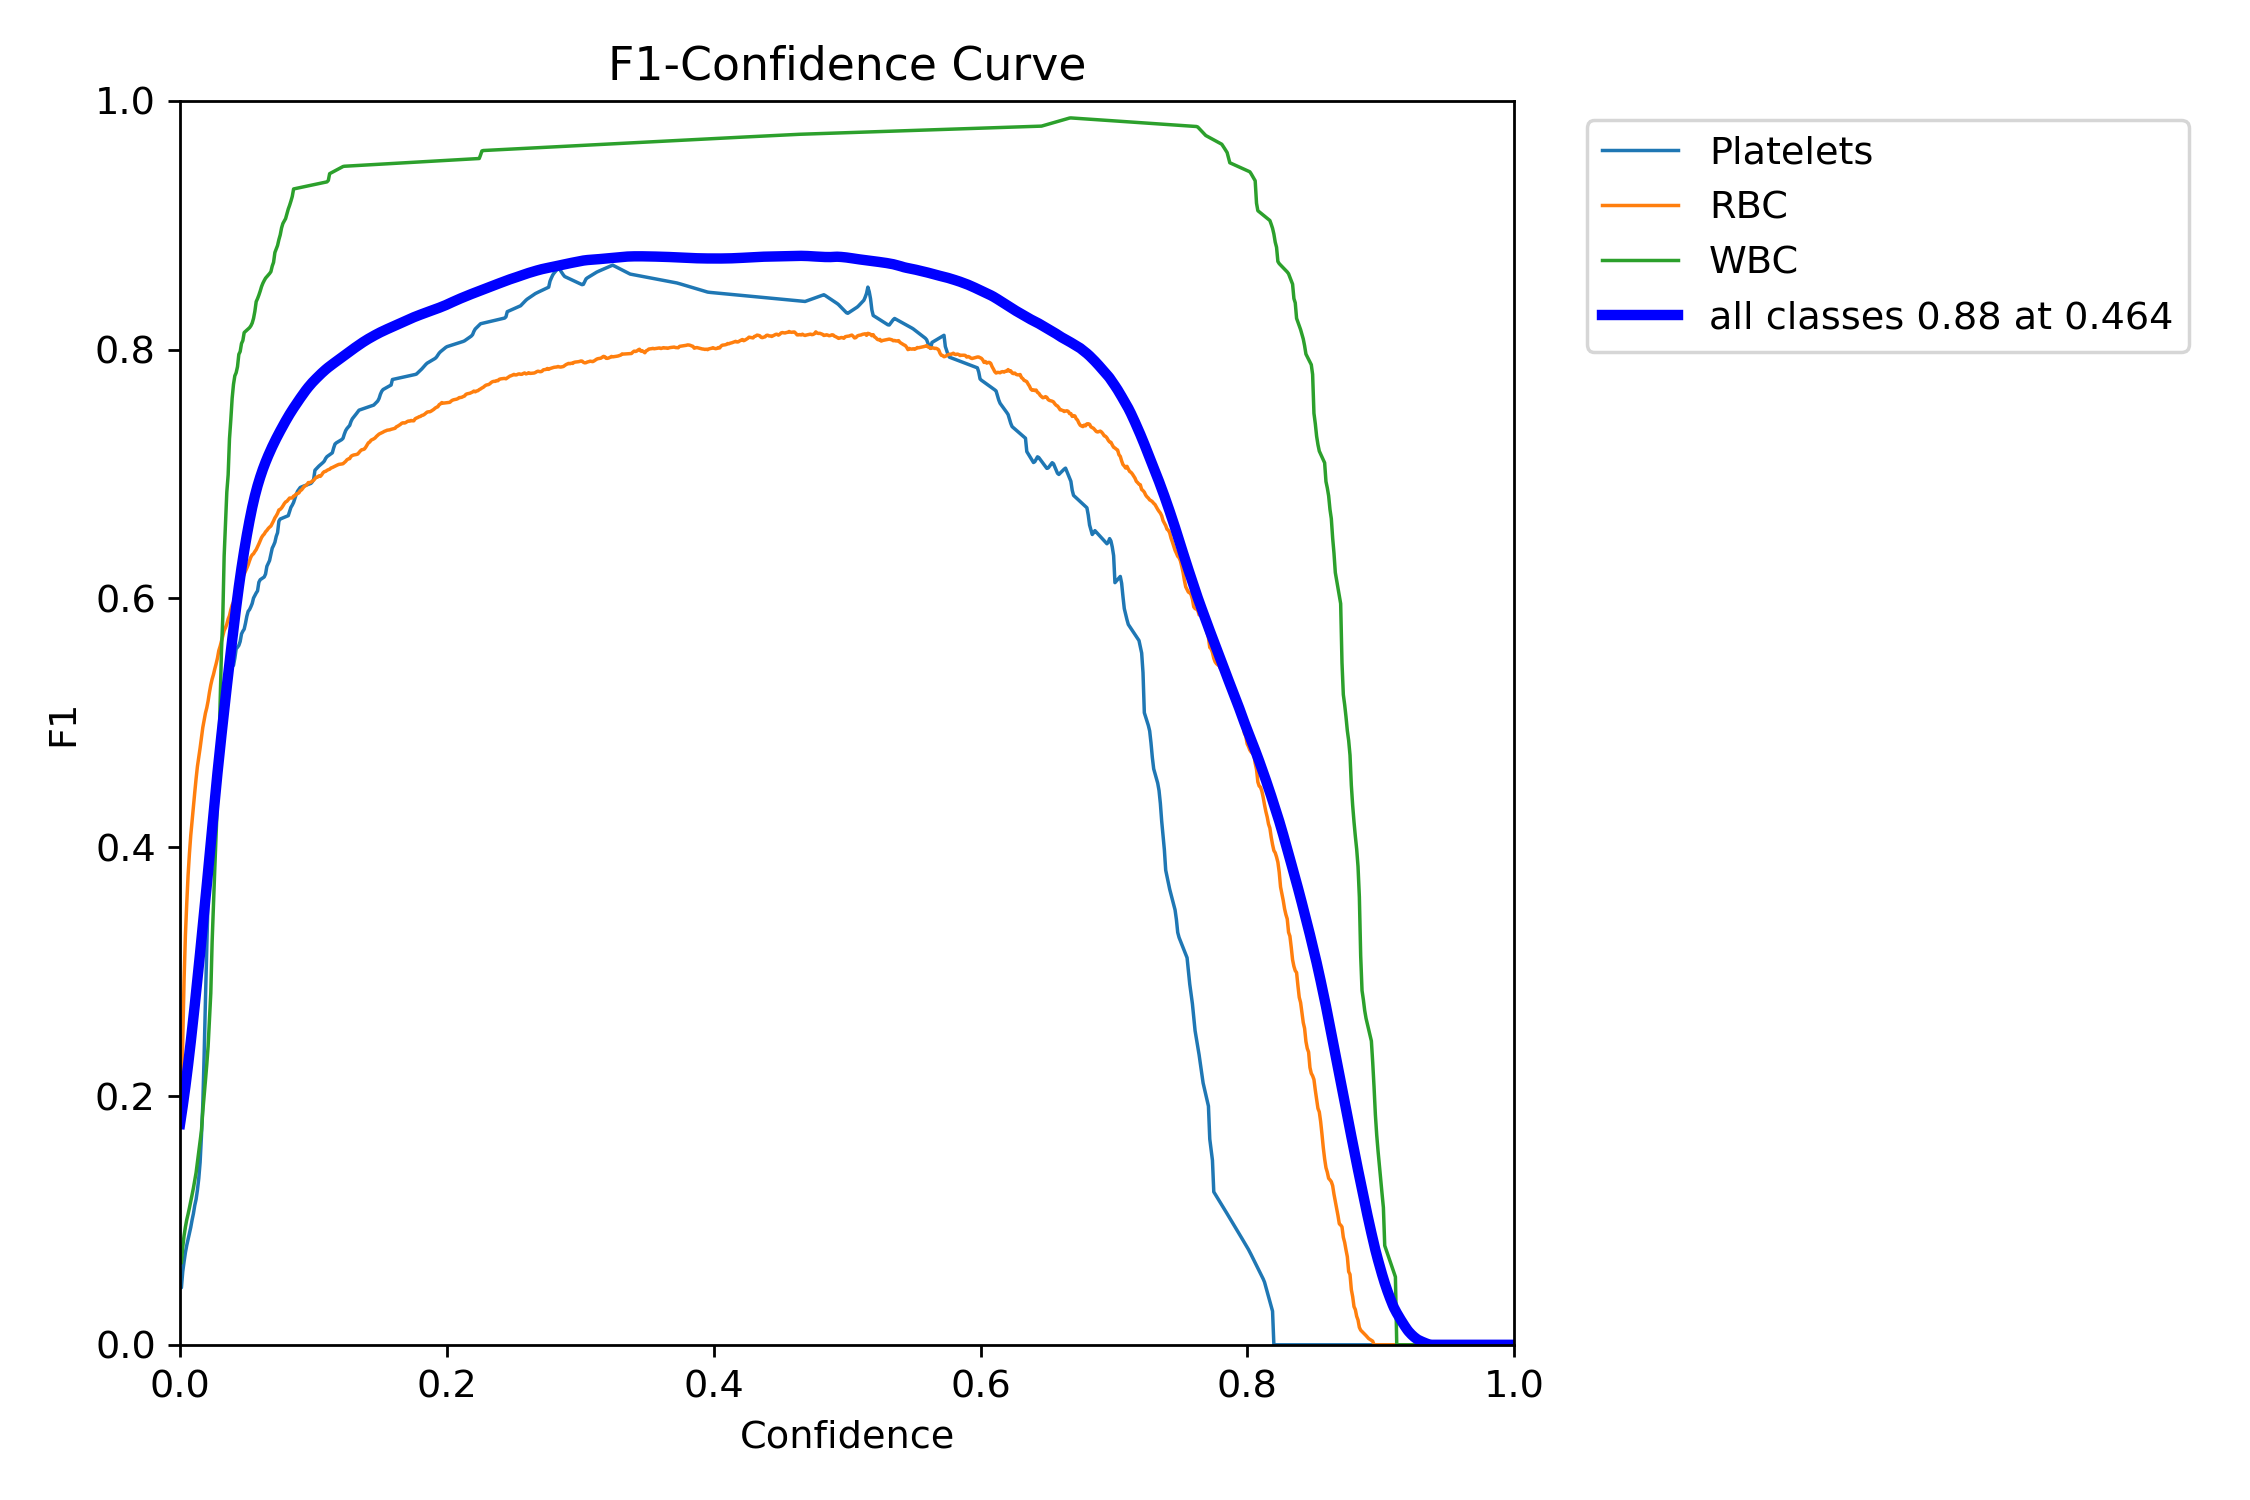

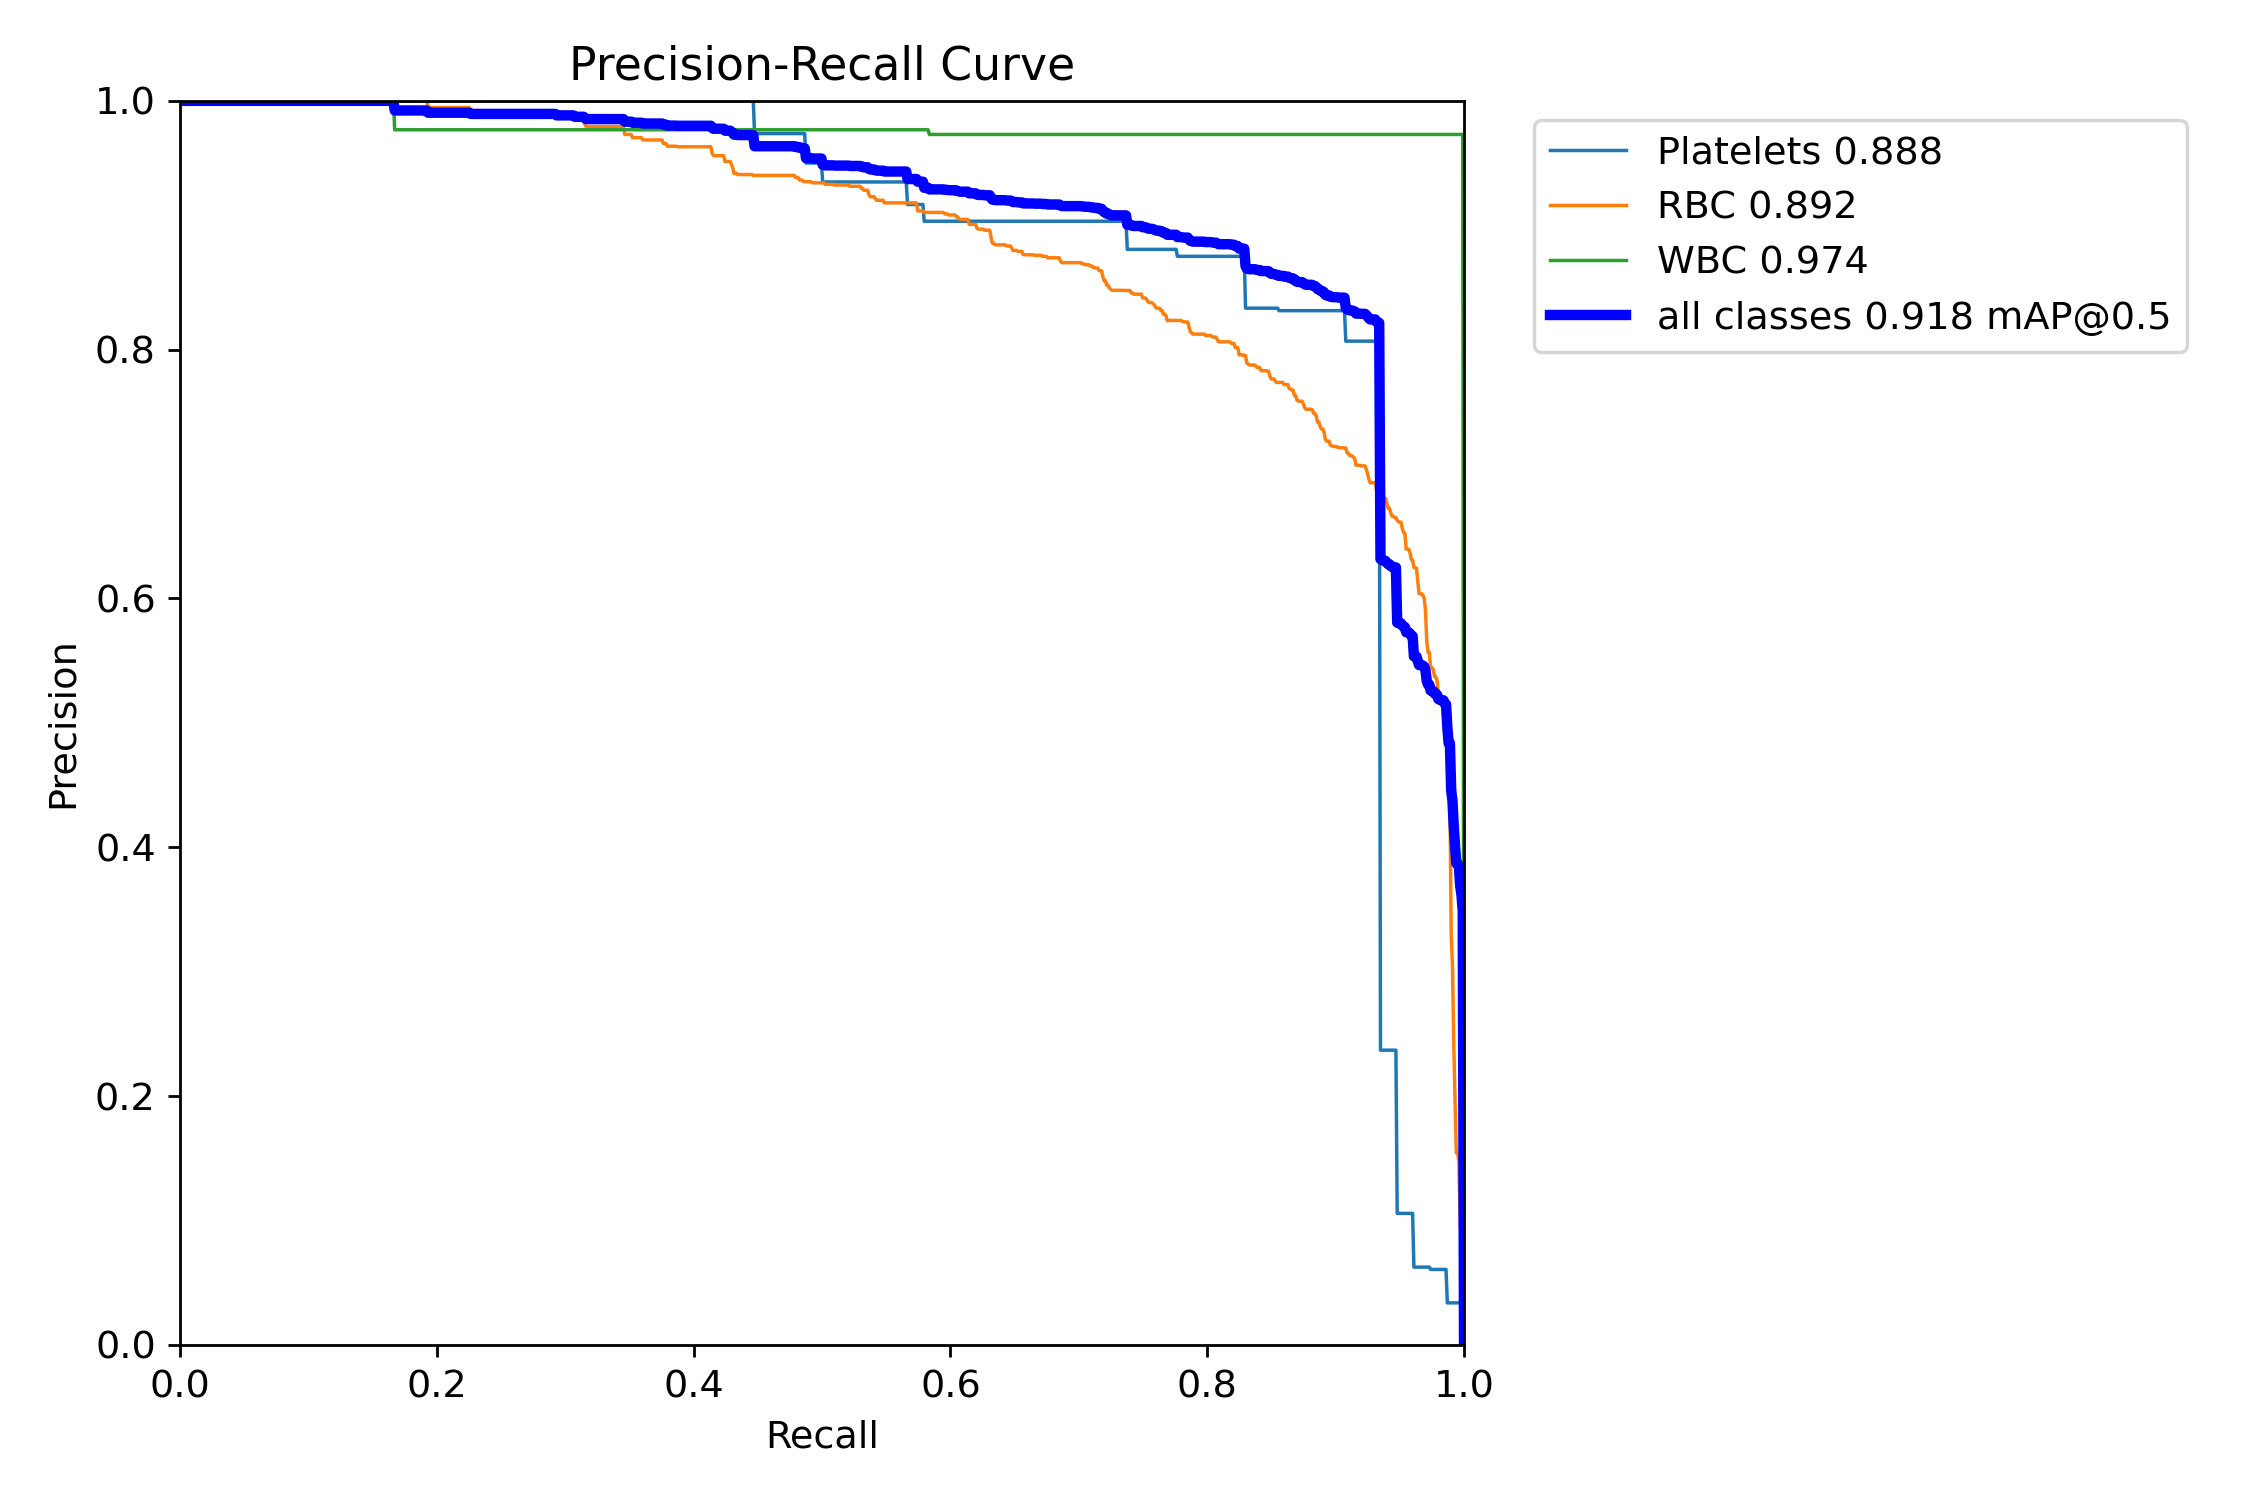

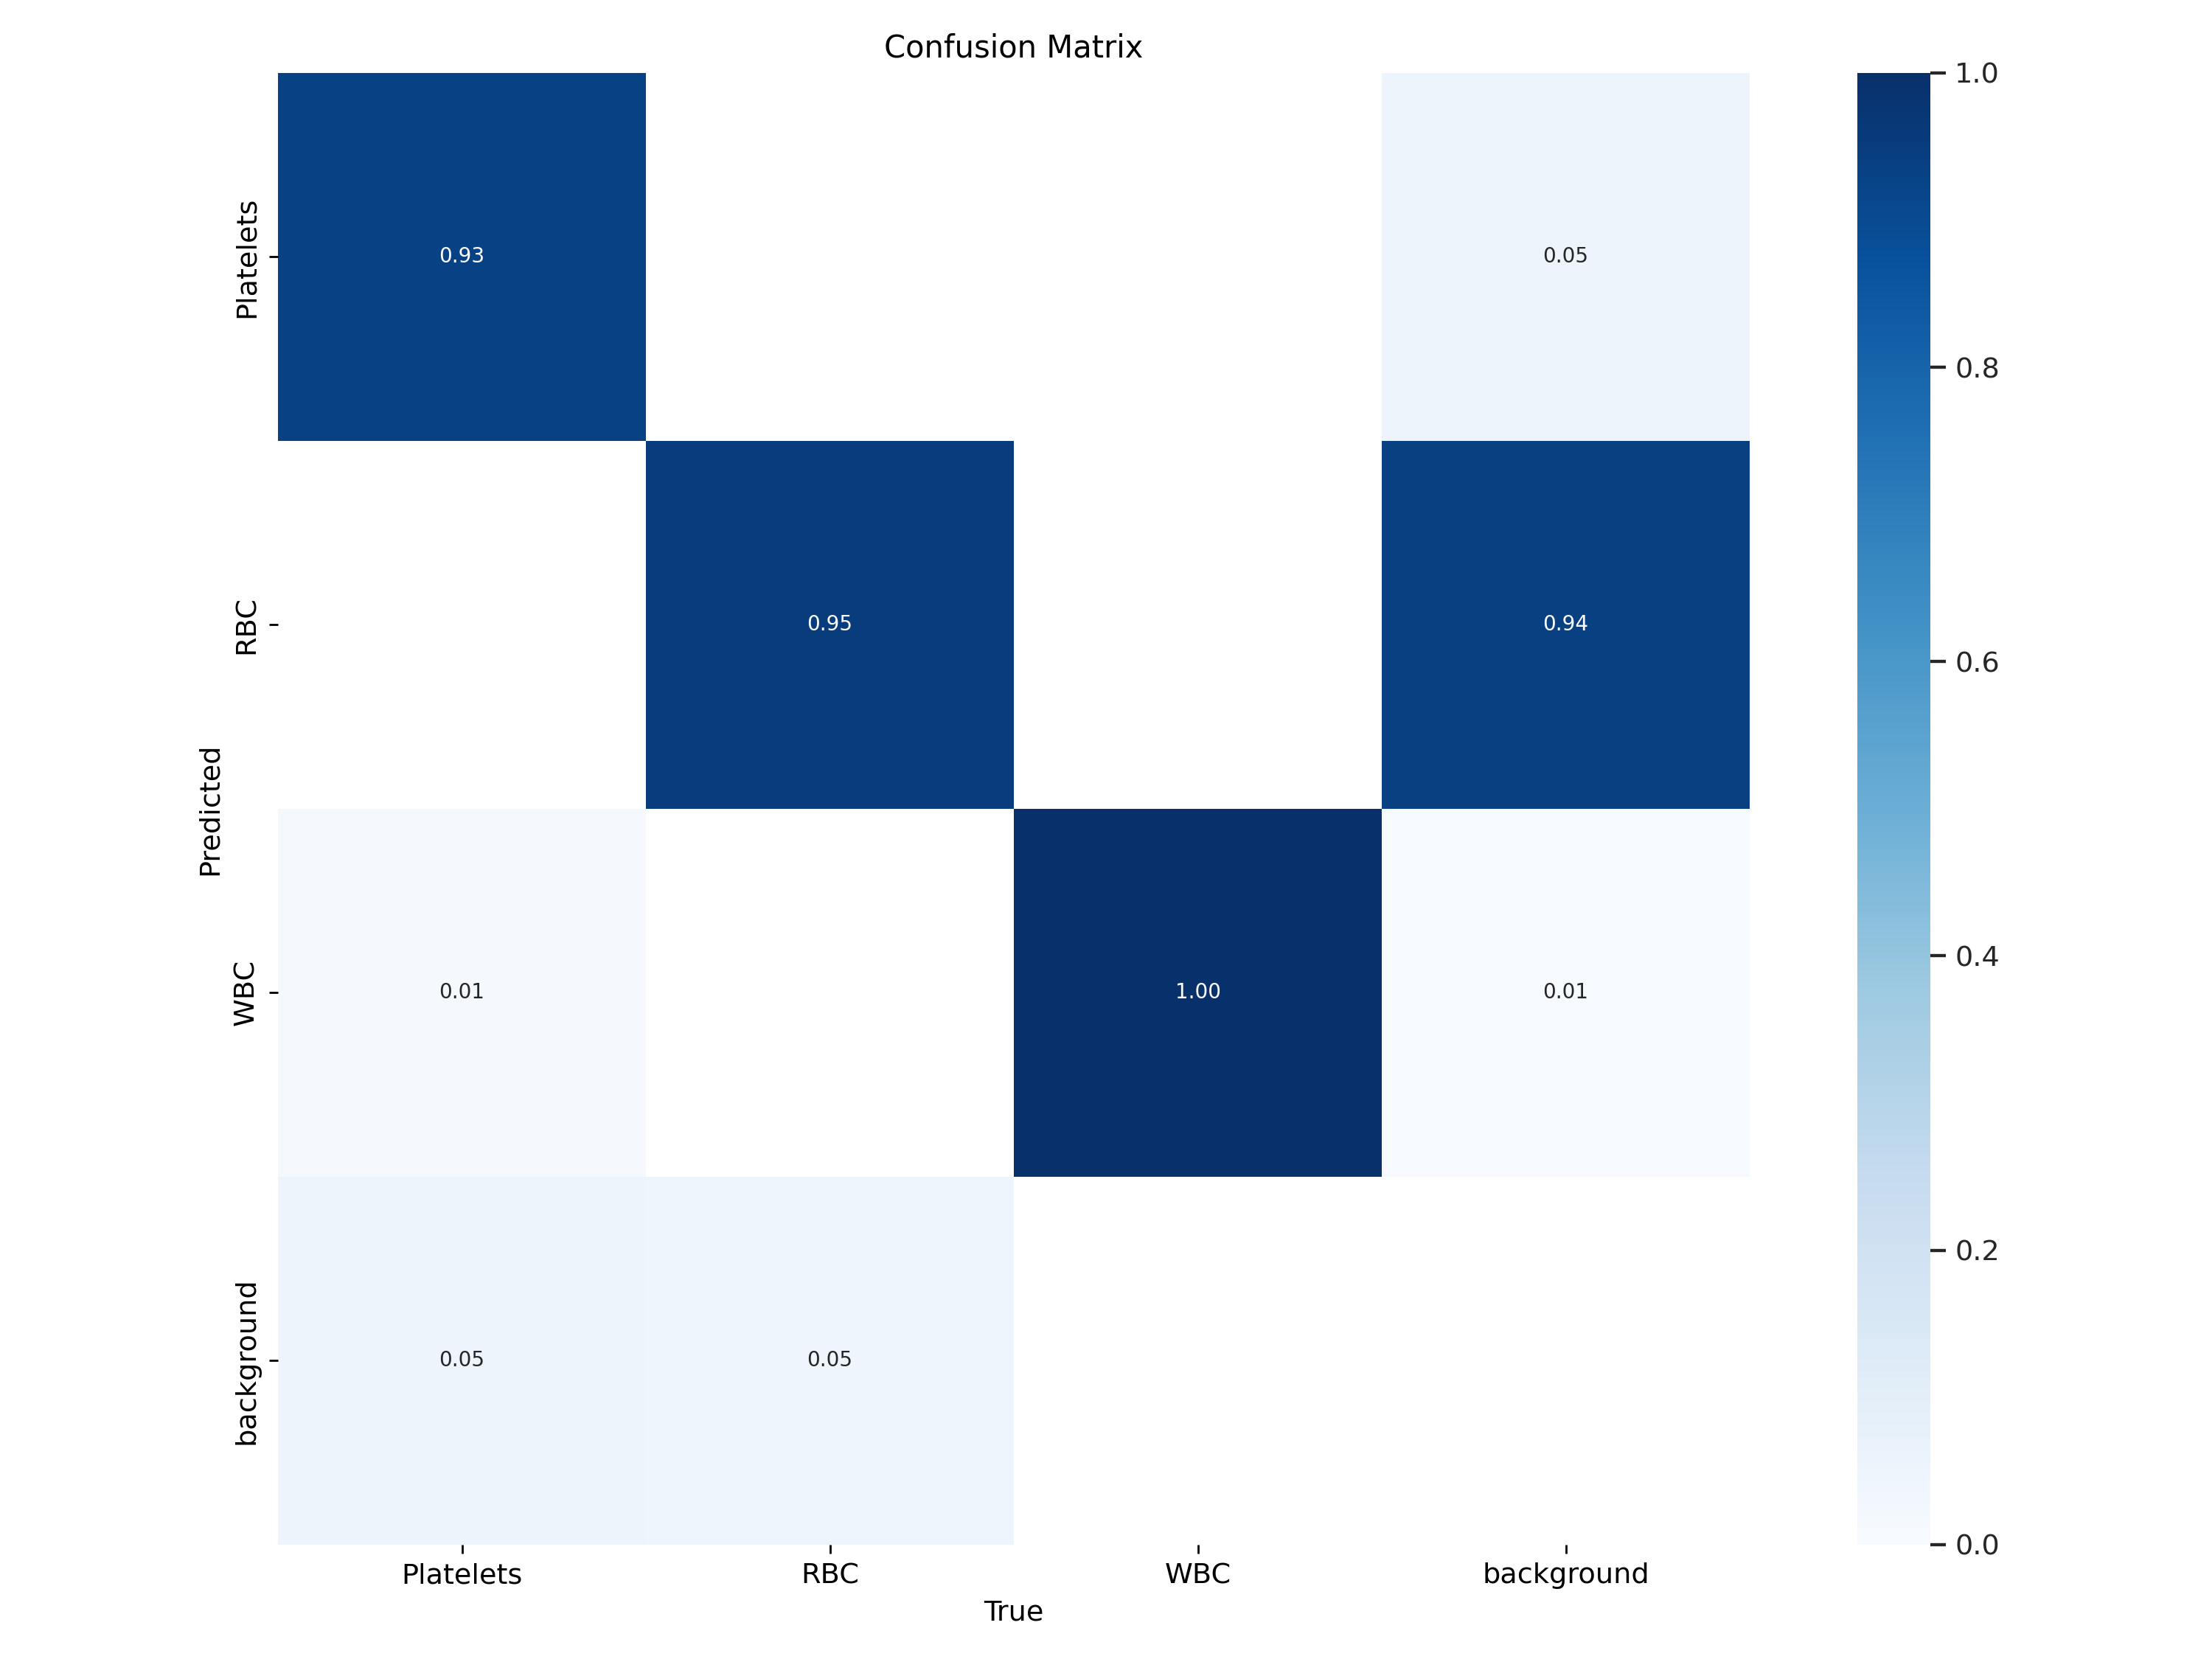

val_results.png not found in runs/val/exp


In [8]:
import glob
import IPython.display as display
import os

val_dirs = sorted(glob.glob("runs/val/exp*"))
if not val_dirs:
    print("No runs/val/exp* folders found. Did val.py --plots run successfully?")
else:
    latest_val_dir = val_dirs[-1]
    print(f"Latest validation folder: {latest_val_dir}")

    # YOLOv5 typically produces F1_curve.png, PR_curve.png, confusion_matrix.png, val_results.png
    visuals = ["F1_curve.png", "PR_curve.png", "confusion_matrix.png", "val_results.png"]
    for img_name in visuals:
        path = os.path.join(latest_val_dir, img_name)
        if os.path.exists(path):
            display.display(display.Image(filename=path, width=600))
        else:
            print(f"{img_name} not found in {latest_val_dir}")

**Overall Analysis:**

The metrics indicate that the model performs exceptionally well, with high precision, recall, and F1 scores across all classes.

Misclassifications are minimal, and the results are suitable for deployment or further refinement.

The slightly lower performance for RBC detection suggests room for improvement, potentially by enhancing dataset quality or model tuning.

# BLOCK 9: Detection on Test



The code runs YOLOv5's detection script to make predictions on test images. Here's what it does:

--weights: Specifies the path to the best model weights (best.pt) from the training phase

--source: Points to the directory containing the test images

--img: Sets the input image size to 640x640 pixels for inference

--conf: Sets the confidence threshold to 0.25, meaning only predictions with at least 25% confidence will be included

--name: Assigns the name single_folder_detect to the output folder where the detection results will be saved

This script generates predictions for the test images and saves the results (including annotated images) in the runs/detect/single_folder_detect directory.

In [9]:
test_images_path = "/content/drive/MyDrive/BloodCellDetection/test/images"
best_weights_path = "/content/yolov5/runs/train/single_folder_exp/weights/best.pt"

!python detect.py \
  --weights {best_weights_path} \
  --source "{test_images_path}" \
  --img 640 \
  --conf 0.25 \
  --name single_folder_detect

detect: weights=['/content/yolov5/runs/train/single_folder_exp/weights/best.pt'], source=/content/drive/MyDrive/BloodCellDetection/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=single_folder_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/36 /content/drive/MyDrive/BloodCellDetection/test/images/BloodImage_00038_jpg.rf.03bd3f26d2c86bdd5bfada9cac475eef.jpg: 640x640 2 Plateletss, 27 RBCs, 1 WBC, 11.5ms
image 2/36 /content/drive/MyDrive/BloodCellDetection/test/i

# BLOCK 10: Visualize Test Outputs



The code displays annotated images generated by YOLOv5 after detecting objects in the test dataset:

Search for Annotated Images: It looks for .jpg files in the detection results folder (runs/detect/single_folder_detect). If no images are found, it prints a message indicating potential issues (e.g., no results generated or no recognizable images in the test folder).

Display Images: For each annotated image found, it displays the image using IPython's display function (resized to 600px width) and prints the file path for reference.

This provides a visual review of YOLOv5's detection results on the test images.

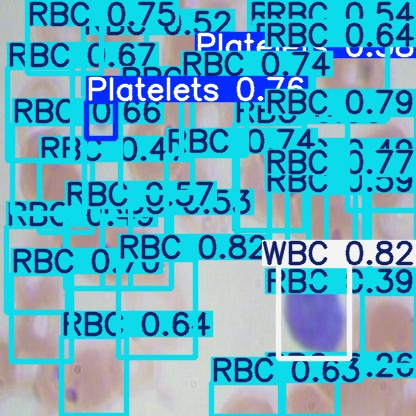

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00038_jpg.rf.03bd3f26d2c86bdd5bfada9cac475eef.jpg



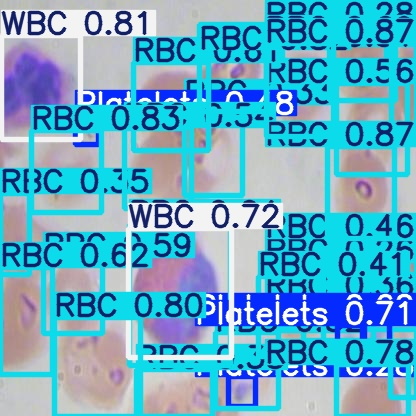

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00044_jpg.rf.8c7c002d9c66db2405d91d52ba69e365.jpg



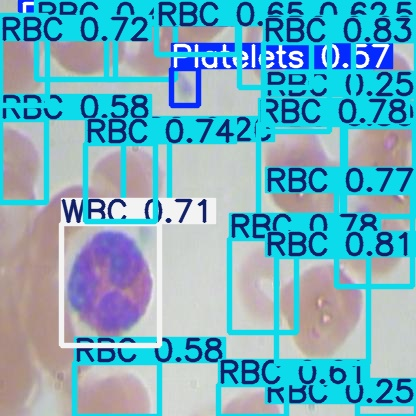

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00062_jpg.rf.ffe1b6c6ecd4e798ced1b0614e841fc1.jpg



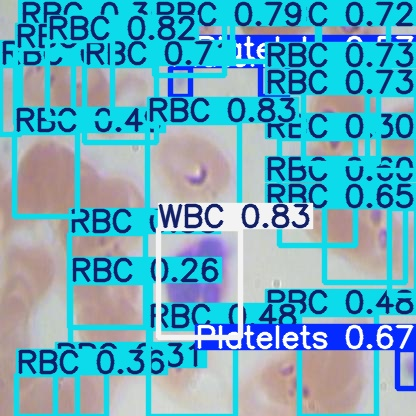

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00090_jpg.rf.f6ebfdf834b4742320257f5996c5026f.jpg



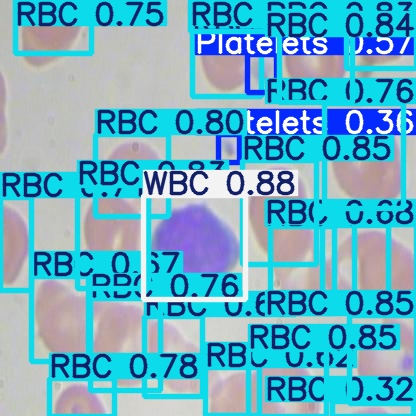

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00099_jpg.rf.4f4f1757c6f369407648a08ce1a4e195.jpg



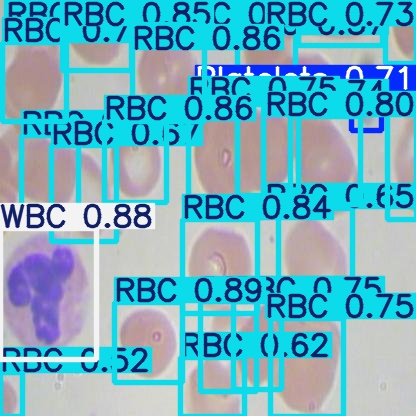

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00112_jpg.rf.c5e86cc7e160068905669da05ff8bdbb.jpg



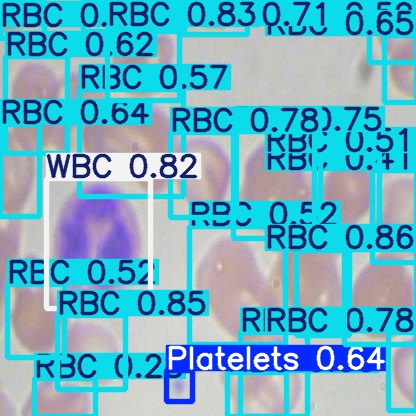

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00113_jpg.rf.c1eb67d5735cc430626d824ef3df9416.jpg



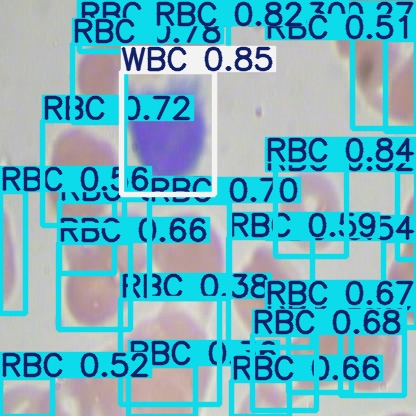

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00120_jpg.rf.4be7c615bc35d7ea5259b79112da1554.jpg



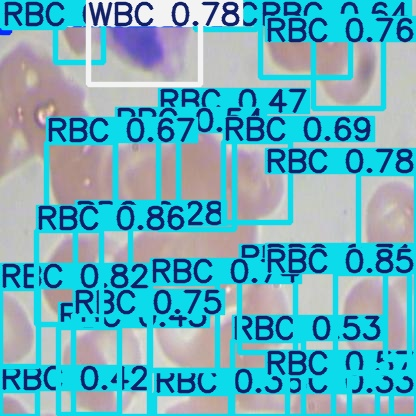

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00133_jpg.rf.cbc04b7cdb985c2dc343781e53a107e3.jpg



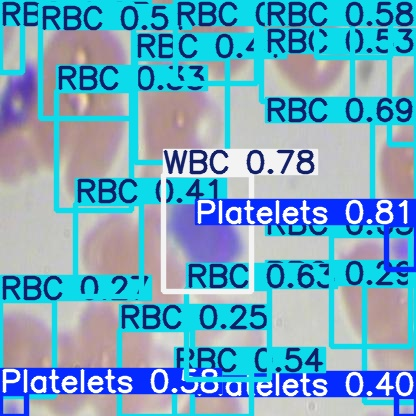

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00134_jpg.rf.7c16f73a1113599308dd8ea5ad6987a2.jpg



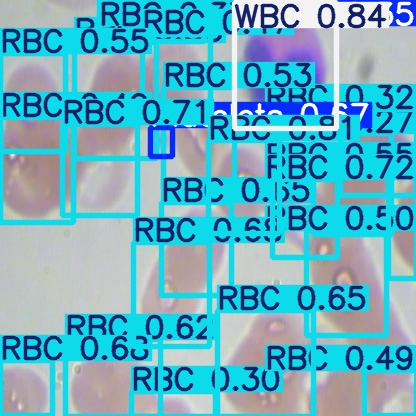

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00154_jpg.rf.eea27ea6e663e7611509f12cb2353bf2.jpg



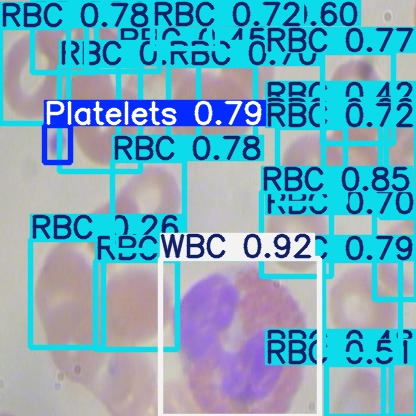

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00160_jpg.rf.9a822f7158c5dd70f31d96133dd01a71.jpg



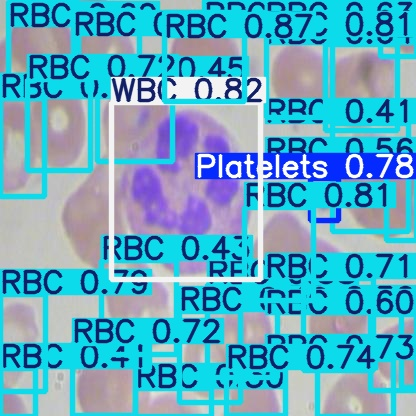

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00190_jpg.rf.d00f9002673e562c2ce41c19247ae6a6.jpg



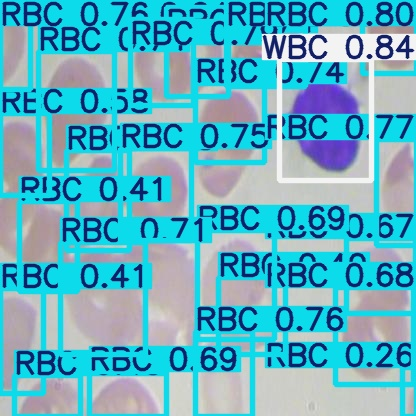

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00191_jpg.rf.702190f2dfe09baee1e43bcdcf8837ea.jpg



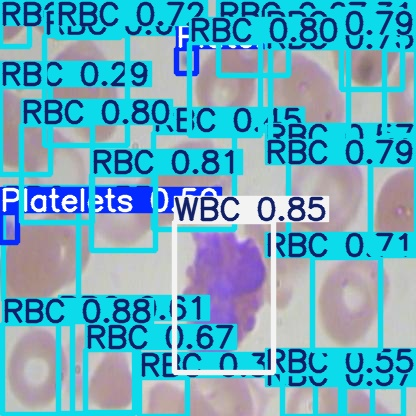

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00204_jpg.rf.0c165f5598814ab9e64de21e73bd5d72.jpg



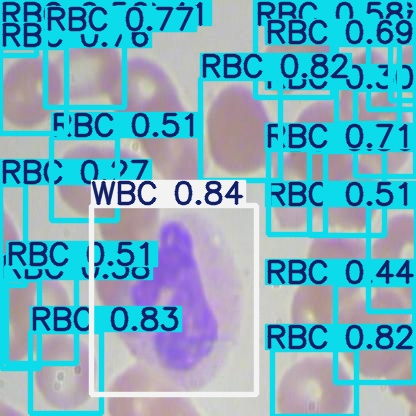

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00227_jpg.rf.322235c59a67d54932ed088bc9c3e343.jpg



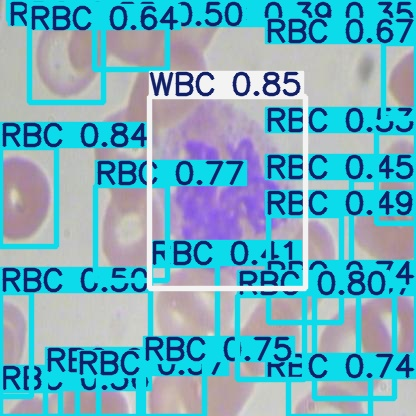

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00235_jpg.rf.e2b94ad873f212ed180c4e9ec8fcab36.jpg



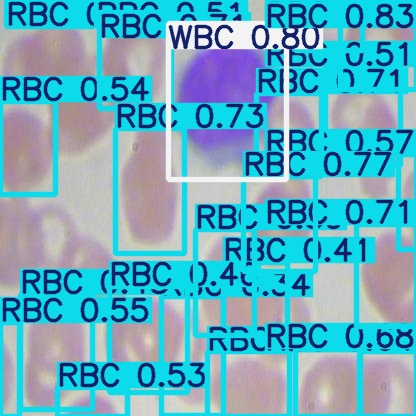

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00241_jpg.rf.de1e7a20c82fbc77a0d9aead3e23d898.jpg



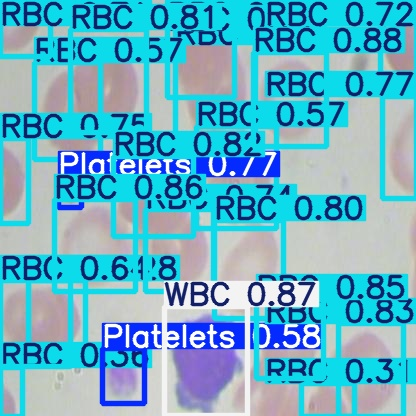

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00254_jpg.rf.8113f3b4e8cfec4d0e5355732d1ab87d.jpg



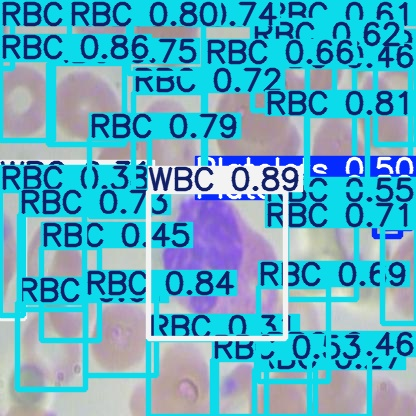

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00265_jpg.rf.65d946656d24ef90c8a8796faa02c521.jpg



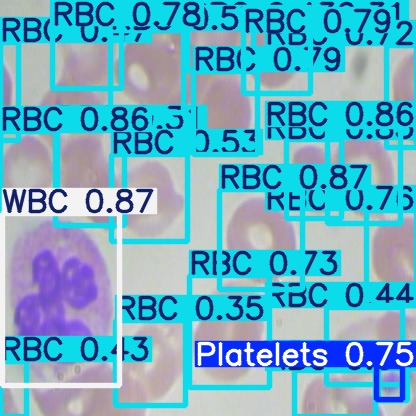

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00266_jpg.rf.604f91e400f51989c283e03dc2782836.jpg



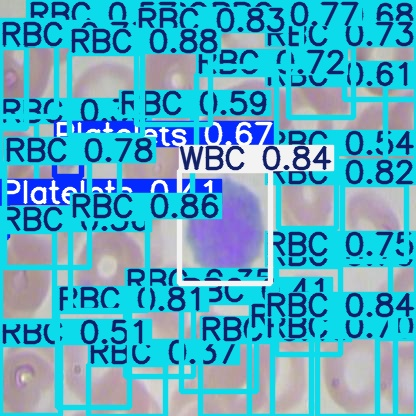

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00275_jpg.rf.e031addcb0ce3160695426028cbb5115.jpg



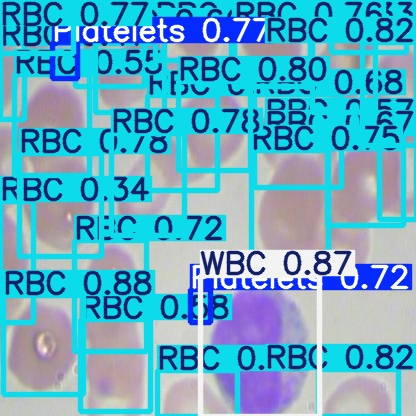

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00278_jpg.rf.8b637c7c0a98499f53e7a3cee8111541.jpg



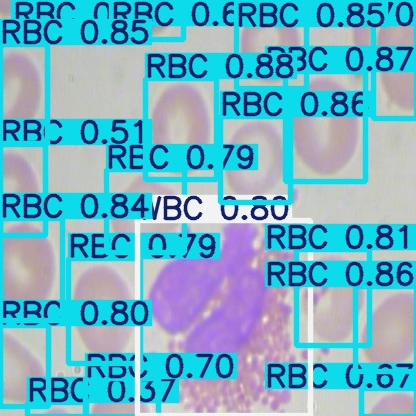

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00284_jpg.rf.bf861784af294af71a62aebc9c980cd6.jpg



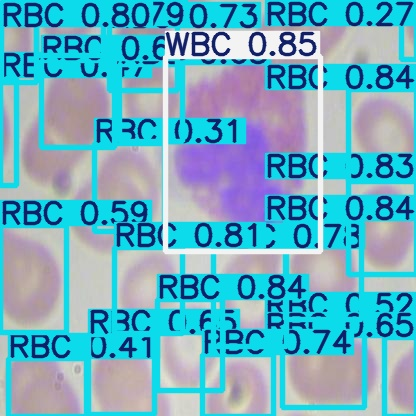

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00289_jpg.rf.c1b2c8be36a97625dd7189d95e7bc0cd.jpg



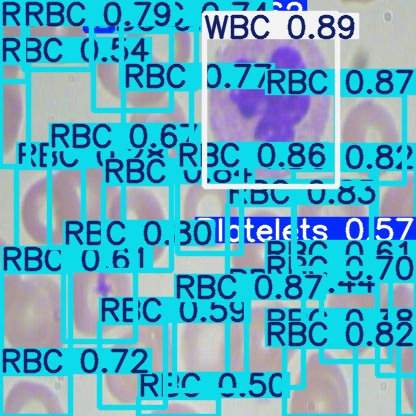

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00301_jpg.rf.6f9827ed1a3fef4892ce2317e2a3c2b6.jpg



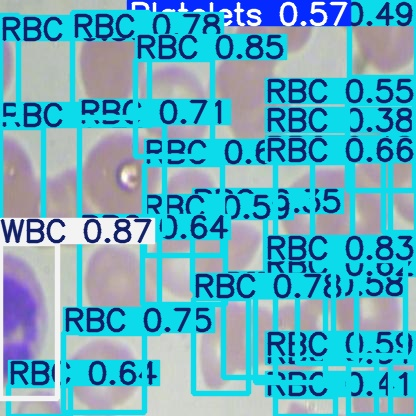

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00302_jpg.rf.4c0b1ea04aa66cfe6dba353a9dd5d22f.jpg



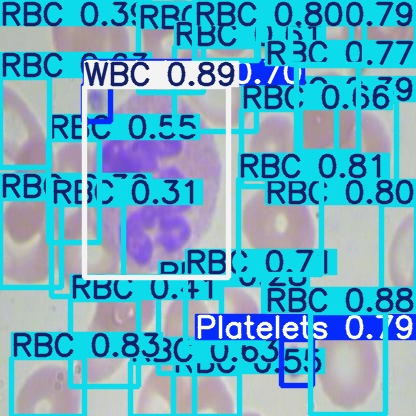

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00325_jpg.rf.7e6301680b7b08c9c82f3e9bffe3abbf.jpg



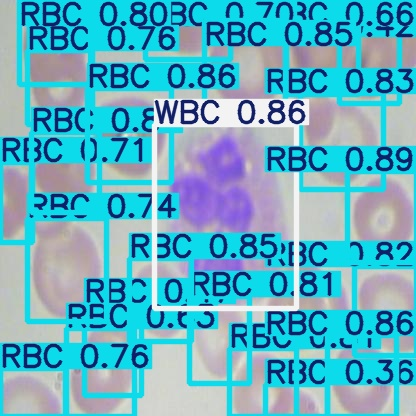

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00334_jpg.rf.df50ec0a3f4881d839584c11fecb5d4f.jpg



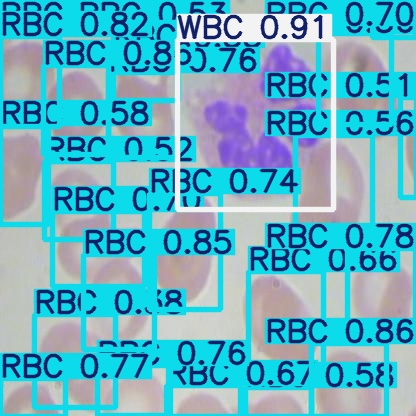

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00336_jpg.rf.ead633ed1bbebbbd81b9ade7ea1c0361.jpg



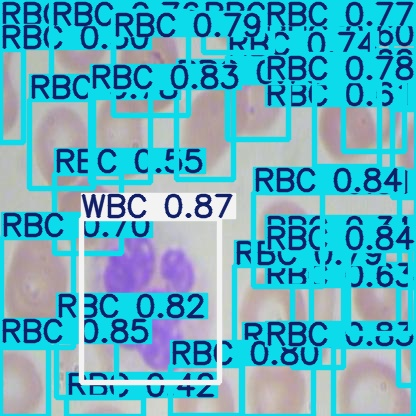

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00337_jpg.rf.8dd69a33b8f29df76d08db39e6d0f794.jpg



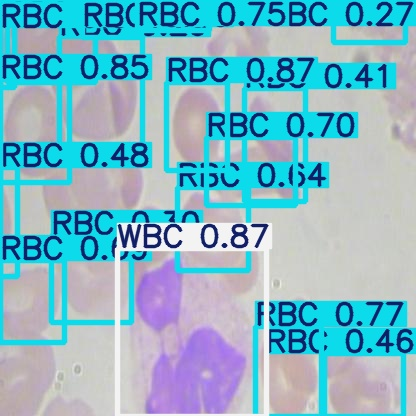

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00350_jpg.rf.d9da014c3699f82272e05ebcb28d5243.jpg



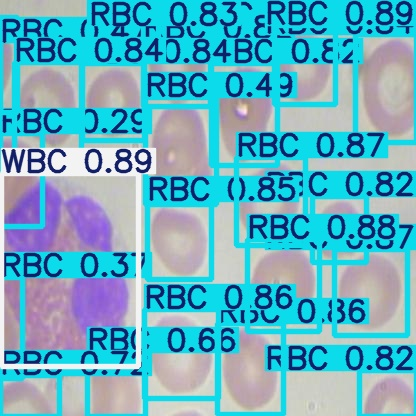

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00359_jpg.rf.3152f9f32463549d195016359cd79e53.jpg



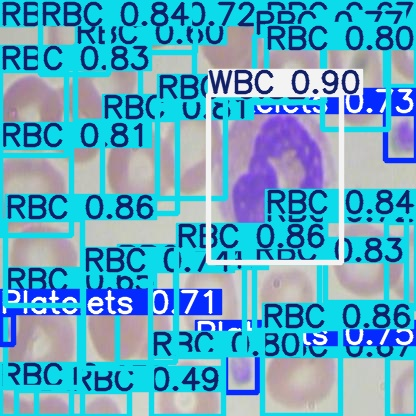

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00369_jpg.rf.fc5f211509b76c18d74ff12719c3a5a3.jpg



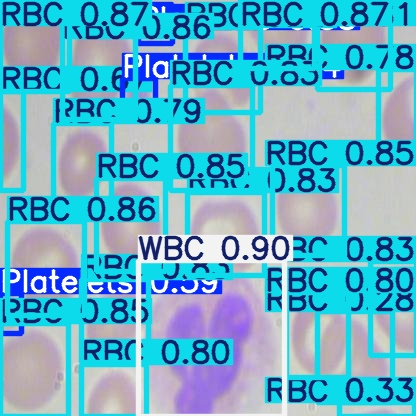

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00385_jpg.rf.199db4f04e1a7265e69ac438b6ab4b79.jpg



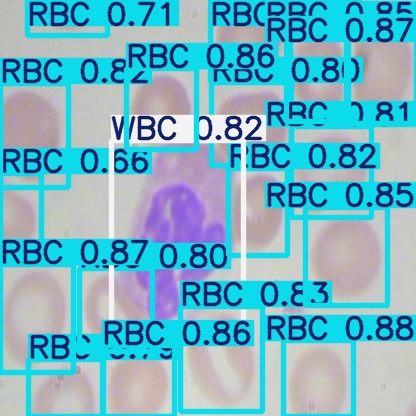

Displayed: /content/yolov5/runs/detect/single_folder_detect/BloodImage_00386_jpg.rf.9ada2f80d934e643a245f0d3db19f4a4.jpg



In [10]:
import glob
from IPython.display import Image, display

detected_dir = "/content/yolov5/runs/detect/single_folder_detect"
detected_images = sorted(glob.glob(f"{detected_dir}/*.jpg"))

if not detected_images:
    print(f"No annotated images found in '{detected_dir}'.")
    print("Check if YOLOv5 wrote them to a different folder or if your test folder had no recognized images.")
else:
    for img_path in detected_images:
        display(Image(filename=img_path, width=600))
        print(f"Displayed: {img_path}\n")

The model performs well in detecting and classifying blood cells (RBC, WBC) and Platelets.

# BLOCK 11: CSV Parsing


The code analyzes YOLOv5 training metrics stored in a CSV file and visualizes them:

Read Training Metrics: It loads the CSV file containing training results (results.csv) into a Pandas DataFrame and displays the first 10 rows to inspect the data structure.

Rename Columns: Adjusts column names to more readable ones (val/precision and val/recall) for better clarity.
Reset Index: Resets the DataFrame index and renames it to epoch for easier plotting.

Plot Precision & Recall: Plots the validation precision and recall scores over training epochs to observe model performance trends.

Compute F1 Score: Calculates the F1 score using the formula
𝐹
1
=
2
⋅
precision
⋅
recall
precision
+
recall
F1=2⋅
precision+recall
precision⋅recall
​
  and visualizes it over epochs to assess the balance between precision and recall.
  
If the CSV file is missing, it prints an error message suggesting the need to check the training process and file location.

                  epoch        train/box_loss        train/obj_loss  \
0                     0              0.108300               0.15187   
1                     1              0.086011               0.14440   
2                     2              0.071798               0.14274   
3                     3              0.063593               0.13861   
4                     4              0.062329               0.13900   
5                     5              0.065852               0.13088   
6                     6              0.063249               0.13718   
7                     7              0.057037               0.12860   
8                     8              0.052805               0.13672   
9                     9              0.050591               0.13110   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.040267               0.01618               0.18494   
1              0.030185               0.77199               0.14204   
2    

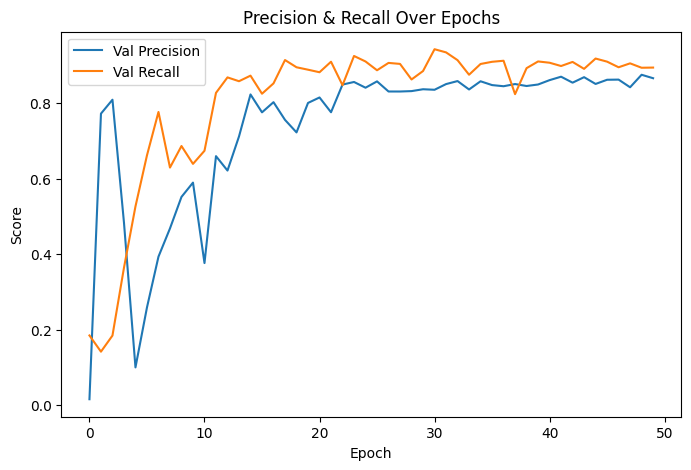

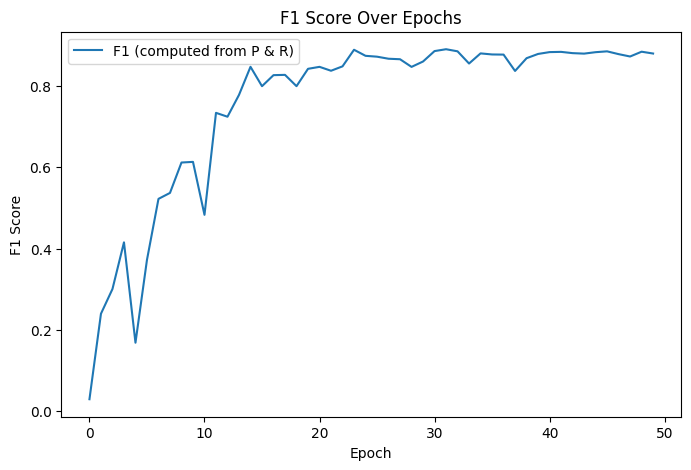

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/content/yolov5/runs/train/single_folder_exp/results.csv"

try:
    df = pd.read_csv(csv_path)
    print(df.head(10))  # Inspect first 10 rows
    print("Actual columns:", df.columns)
    df.rename(columns={
        "   metrics/precision": "val/precision",
        "      metrics/recall": "val/recall"
    }, inplace=True)

    print("Columns after rename:", df.columns)
    df.reset_index(inplace=True)
    df.rename(columns={"index": "epoch"}, inplace=True)
    print("Columns after resetting index:", df.columns)
    plt.figure(figsize=(8,5))
    plt.plot(df["epoch"], df["val/precision"], label="Val Precision")
    plt.plot(df["epoch"], df["val/recall"], label="Val Recall")
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.title("Precision & Recall Over Epochs")
    plt.legend()
    plt.show()

    df["computed_F1"] = 2.0 * (df["val/precision"] * df["val/recall"]) / (
        df["val/precision"] + df["val/recall"] + 1e-16
    )

    plt.figure(figsize=(8,5))
    plt.plot(df["epoch"], df["computed_F1"], label="F1 (computed from P & R)")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("F1 Score Over Epochs")
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"Could not find {csv_path}. Make sure training completed and results.csv was generated.")


Overall, the metrics suggest that the training is stable and effective, with steadily improving performance and decreasing losses. The model is learning well and generalizing effectively.


Also, graphs suggest that the model has achieved a strong and stable performance by optimizing precision and recall, leading to a high F1 score. Training appears to have been successful, with no signs of overfitting or underfitting.

# TEST ON LOCAL

In [12]:
ls runs/train/single_folder_exp/weights/


best.pt  last.pt


In [13]:
# Zip  best.pt file:
!zip -r best.zip runs/train/single_folder_exp/weights/best.pt




  adding: runs/train/single_folder_exp/weights/best.pt (deflated 9%)


In [14]:

# Copy best.pt from your YOLOv5 runs folder to your Drive:
!cp /content/yolov5/runs/train/single_folder_exp/weights/best.pt /content/drive/MyDrive/yolo/


In [7]:
!cp /content/drive/MyDrive/yolo/best.pt /content/yolov5/


In [8]:
!pip install opencv-python


In [2]:
# pip install ultralytics==8.0.20


In [17]:
import cv2
from pathlib import Path
from models.common import DetectMultiBackend  # YOLOv5-specific model loading
from utils.general import non_max_suppression
from utils.plots import Annotator, colors
import torch
import numpy as np

# Load YOLOv5 model
weights_path = '/content/yolov5/best.pt'  # Adjust to your file path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use torch.device for compatibility
model = DetectMultiBackend(weights_path, device=device)

# Video file
video_path = '/content/video.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Unable to open video.")
    exit()

# Video writer
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Prepare frame for YOLO
    img = frame[:, :, ::-1].copy()  # Convert BGR to RGB and make a copy to fix negative strides
    img = torch.from_numpy(img).to(device).permute(2, 0, 1).float() / 255.0  # Convert to tensor, normalize
    img = img.unsqueeze(0)  # Add batch dimension

    # Run inference
    results = model(img)  # Inference
    detections = non_max_suppression(results)  # Apply NMS

    # Annotate frame
    annotator = Annotator(frame, line_width=2, example="YOLOv5")
    for det in detections:
        if det is not None and len(det):
            for *box, conf, cls in det:
                annotator.box_label(box, f"{model.names[int(cls)]} {conf:.2f}", color=colors(int(cls), True))

    annotated_frame = annotator.result()
    out.write(annotated_frame)

cap.release()
out.release()
print("Output video saved as 'output.mp4'")


Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs


Output video saved as 'output.mp4'


In [18]:
from google.colab import files
files.download('output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files
files.download("output.mp4")
